## Test des différentes distances sur des jeux de données basés sur des modèles de ressort

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import pandas as pd
from tqdm import tqdm
import pickle
import itertools

from descriptor import compute_descriptor
from wasserstein_distance import compute_wasserstein_distance
from kolmogorov_distance import compute_kolmogorov_dist
from data_functions import load_data, plot_data
import simu_ressort

## Simulation d'un ressort perturbé
(Force qui change de sens selon la vitesse du ressort)

$\frac{d^2V}{dt^2} = -kV - F\frac{dV}{dt}$

### Test

In [12]:
T = 1000
dt = 0.3

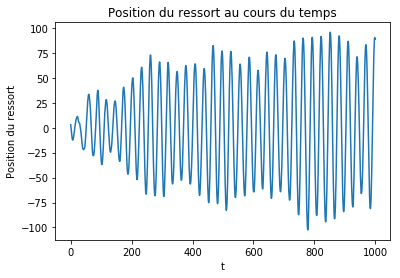

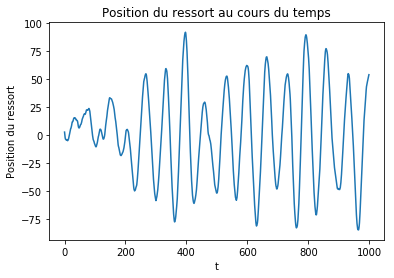

In [13]:
V = simu_ressort.compute_ressort(T, dt, V_0=3, V_1=0, F=.1, k=0.5, Vmin=0.1, Vmax=4, noise=True, sigma=0.5)
simu_ressort.plot_ressort(V)

V2 = simu_ressort.compute_ressort(T, dt, V_0=3, V_1=0, F=.4, k=0.1, Vmin=0.1, Vmax=4, noise=True, sigma=0.5)
simu_ressort.plot_ressort(V2)

### Simuler plein de ressorts ayant le même jeu de paramètres avec des conditions initiales et un bruit différent

**Test:** Générer `N` simulations pour chaque jeu de paramètres: `(F, k)`, puis sauvegarder ces simulations dans `./data/ressort/simu.pkl` pour pouvoir les re-charger ensuite.

In [13]:
N = 200
list_F = [i/10 for i in range(1, 10)]
list_k = [i/10 for i in range(1, 10)]
print(list_F)
list_Vmin = [0.5]
list_Vmax = [5]

simu_ressort.save_several_param_ressort(N, T, dt, list_k, list_F, list_Vmin, list_Vmax, path_save=None)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
81 jeux de parametres chargés


In [4]:
# Load object
all_simus = simu_ressort.load_obj("./data/ressort/simus.pkl")

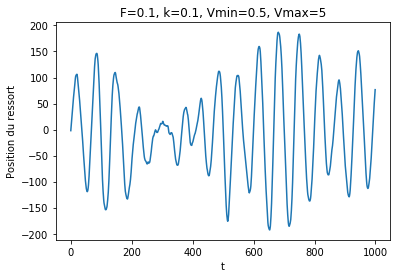

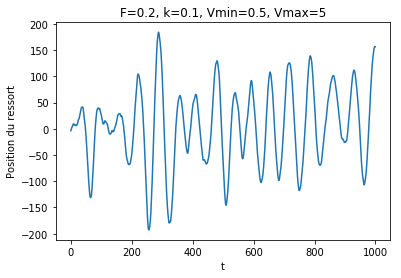

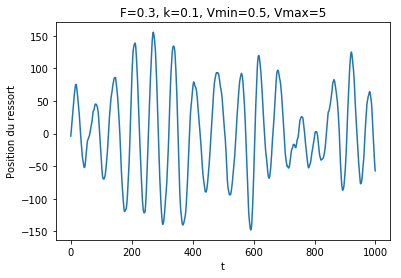

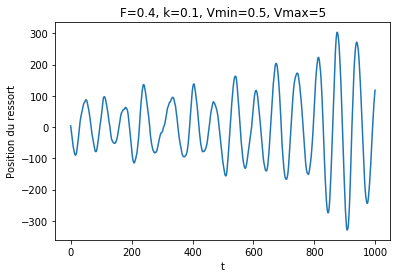

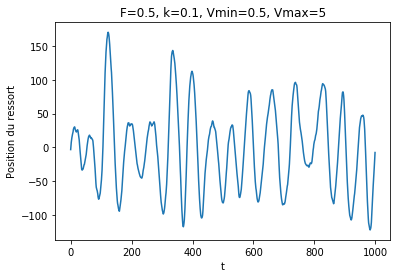

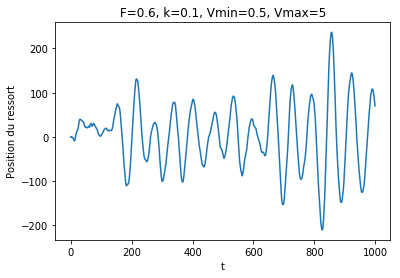

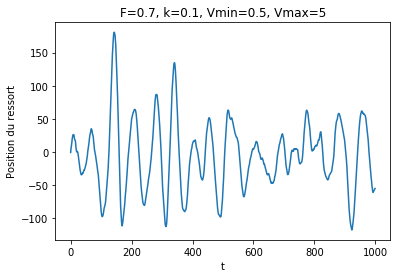

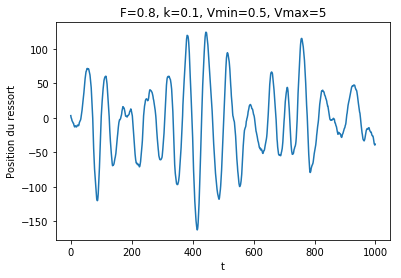

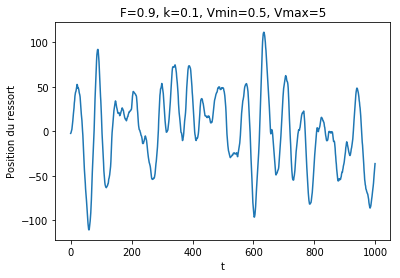

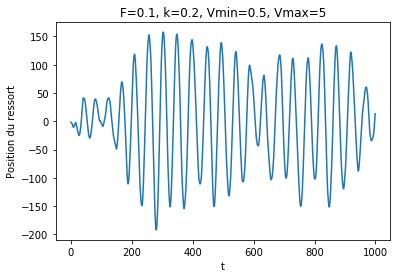

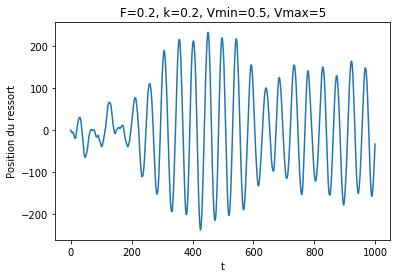

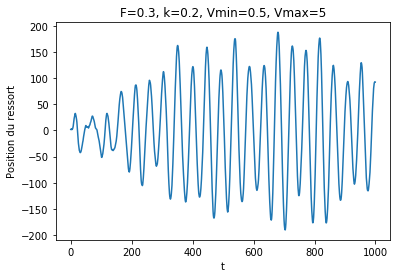

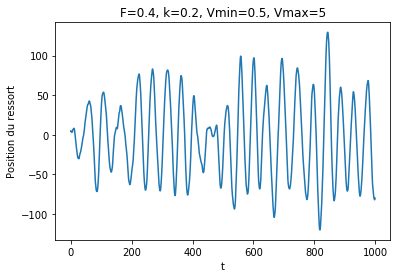

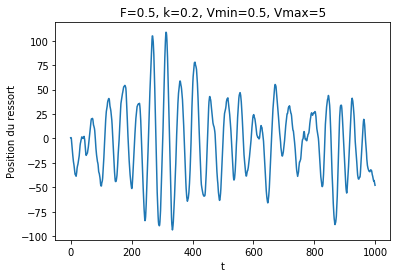

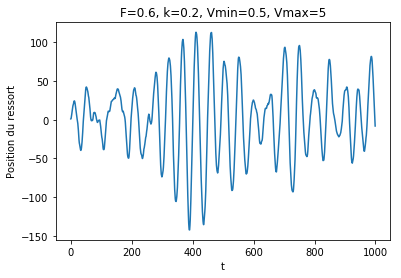

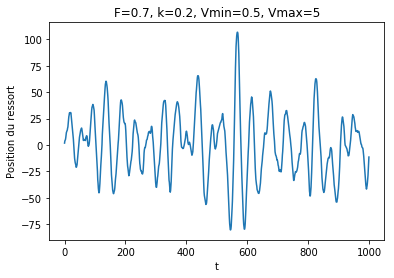

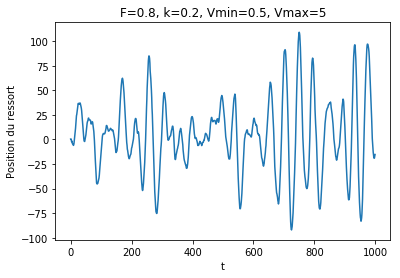

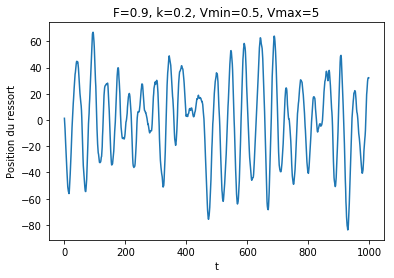

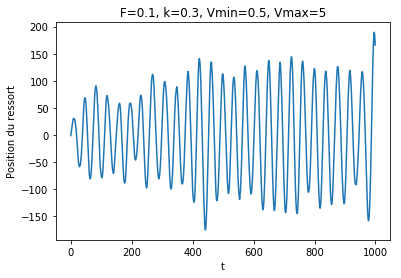

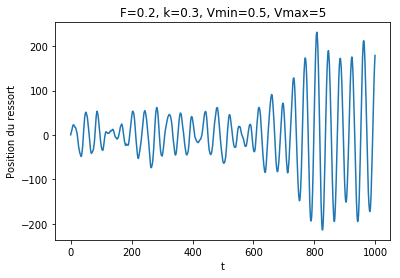

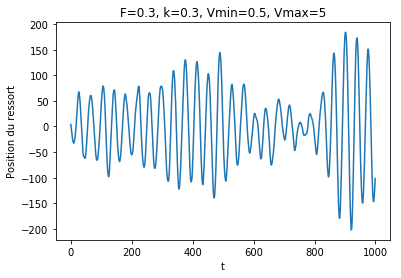

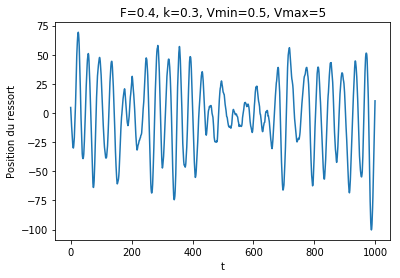

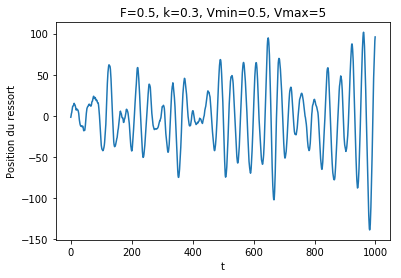

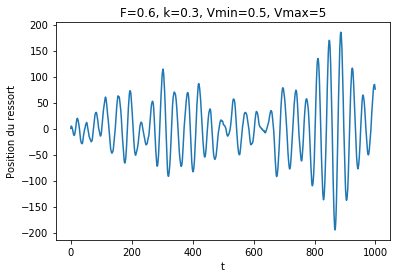

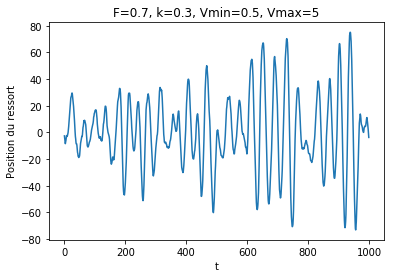

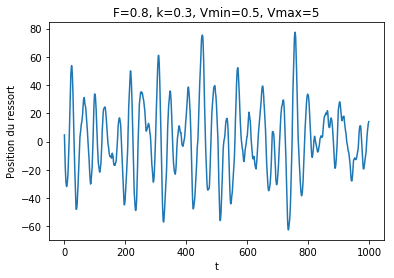

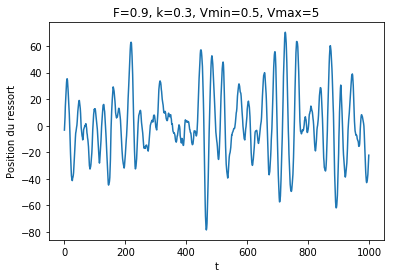

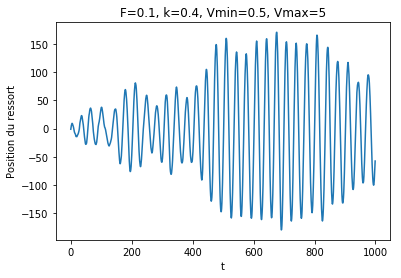

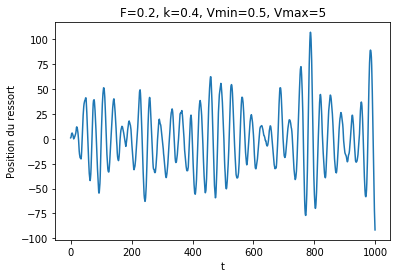

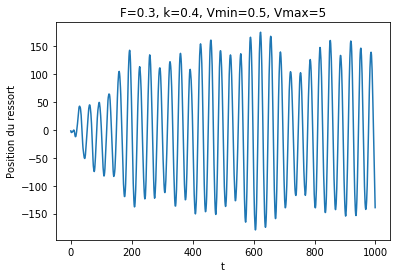

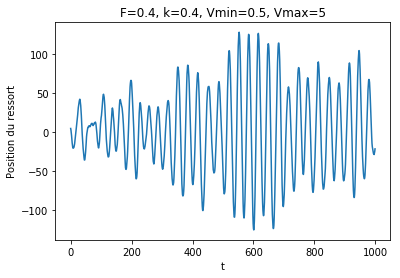

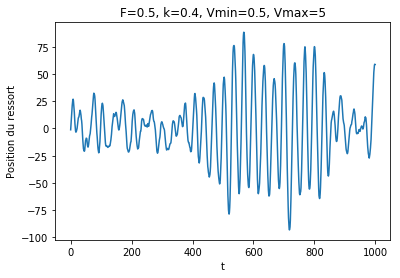

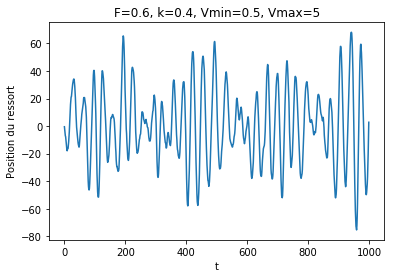

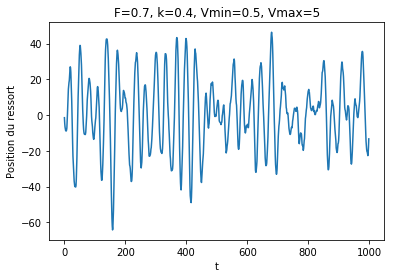

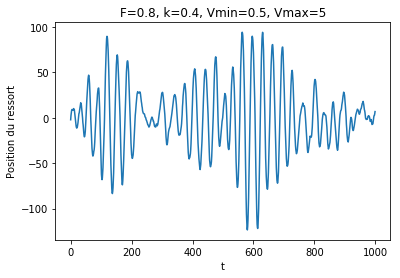

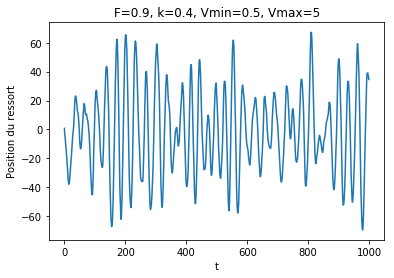

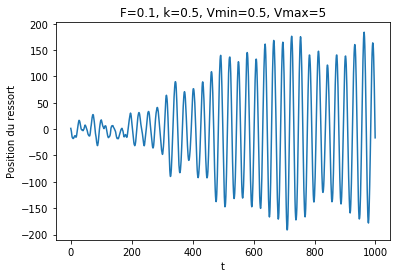

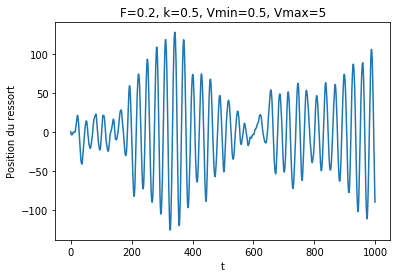

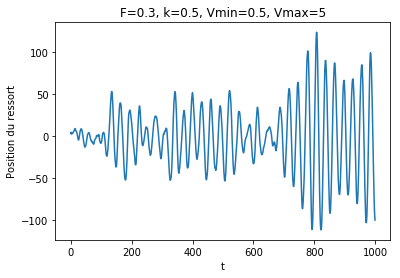

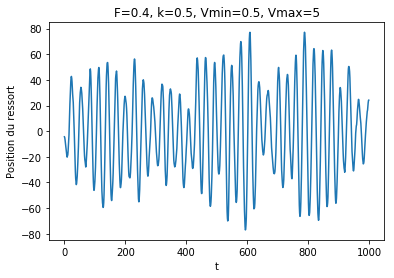

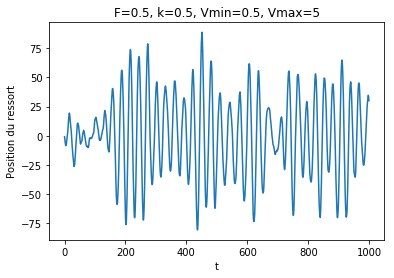

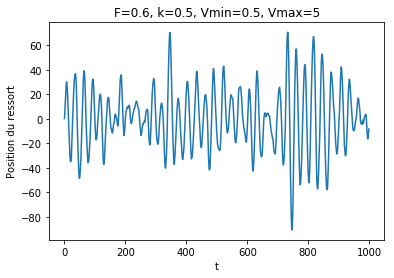

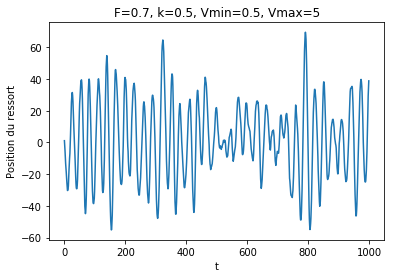

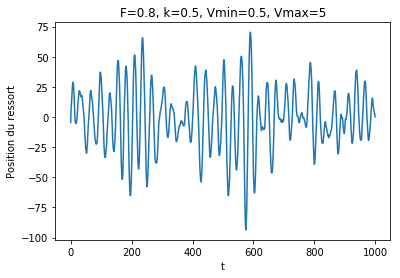

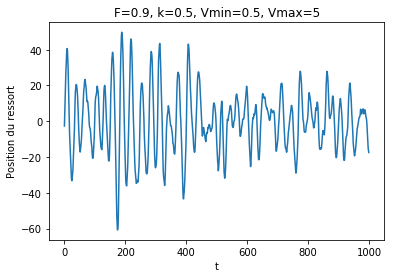

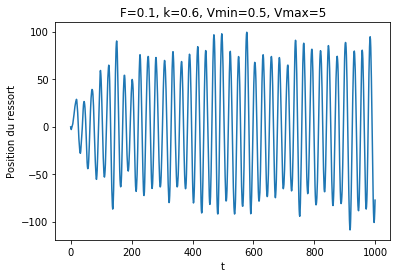

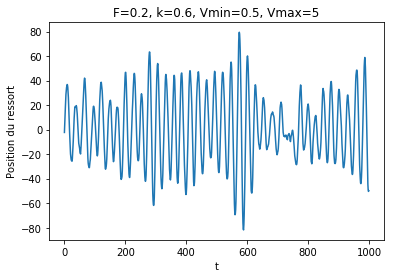

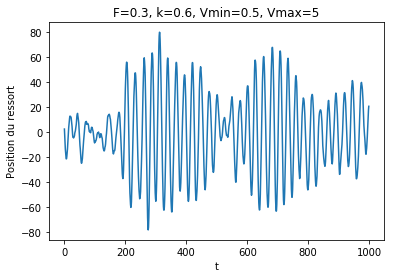

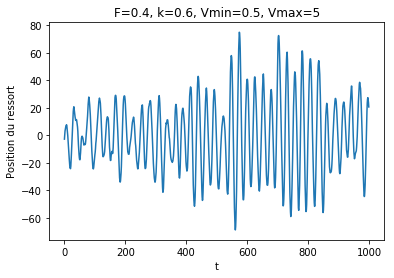

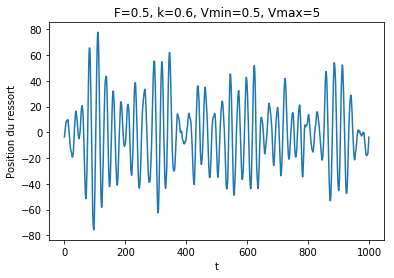

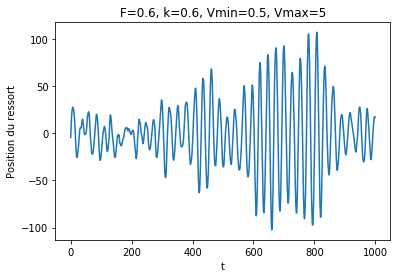

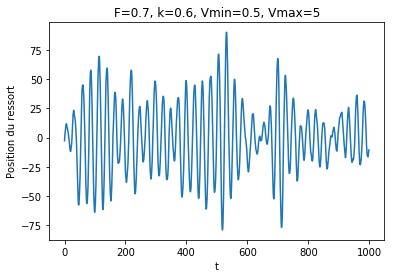

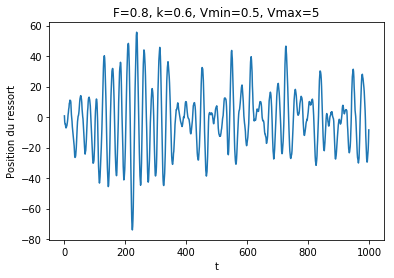

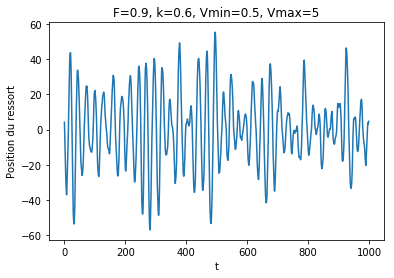

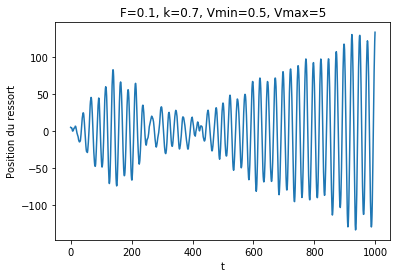

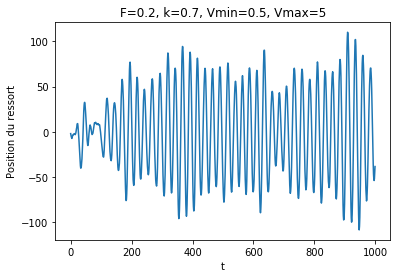

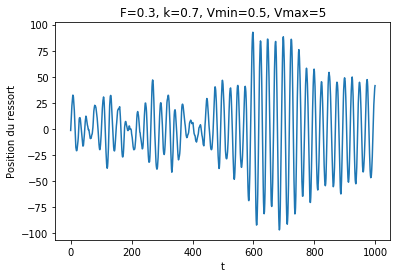

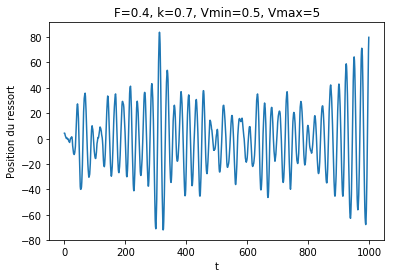

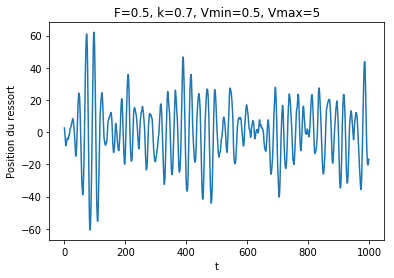

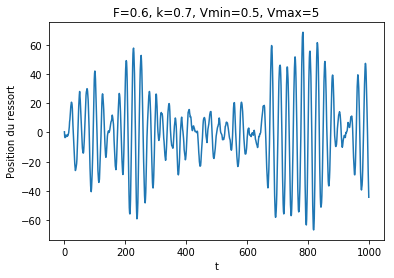

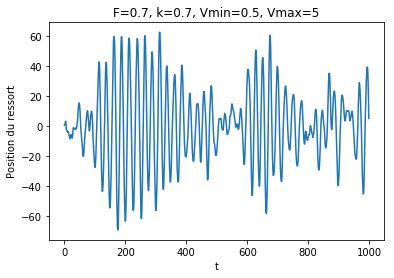

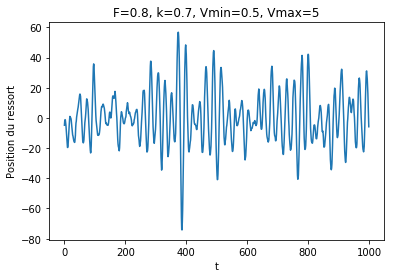

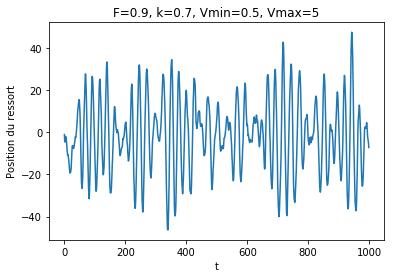

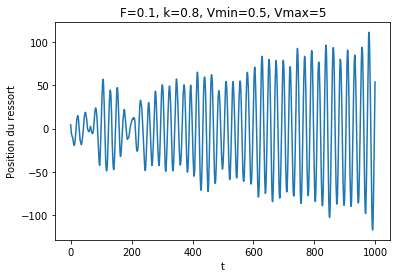

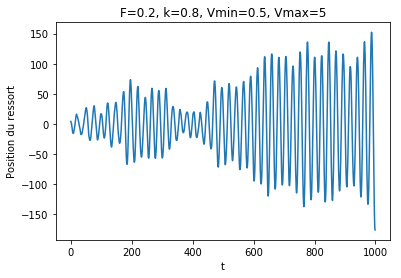

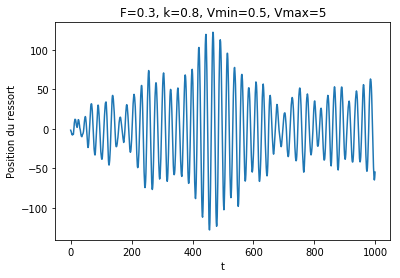

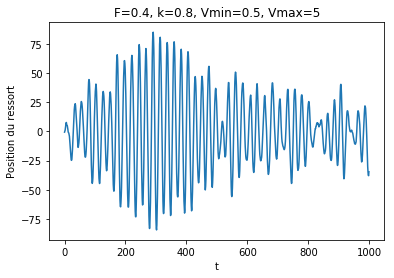

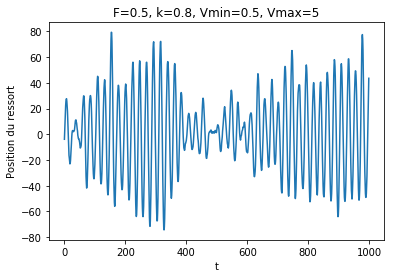

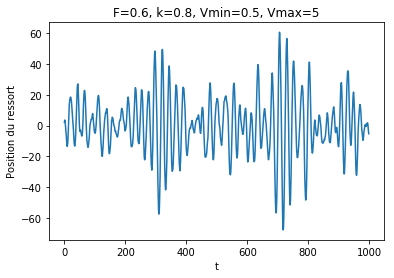

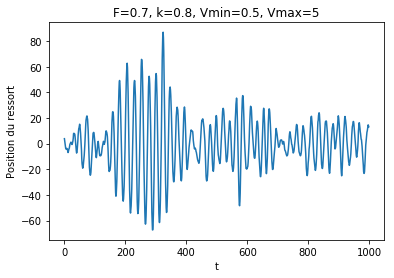

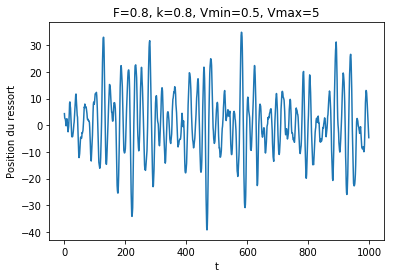

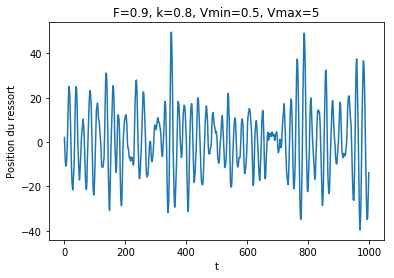

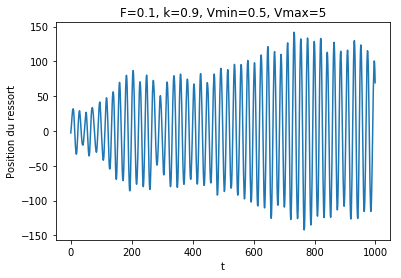

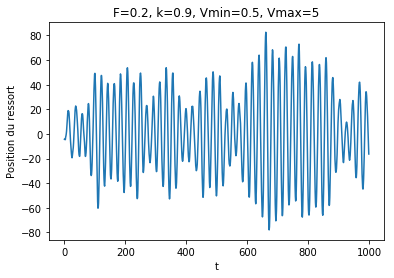

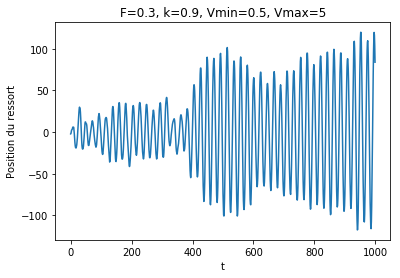

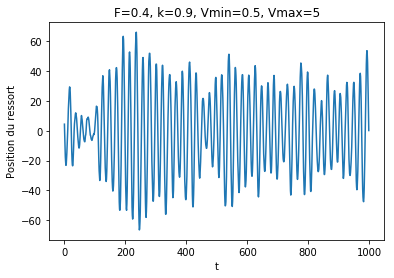

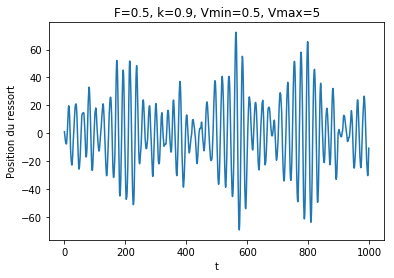

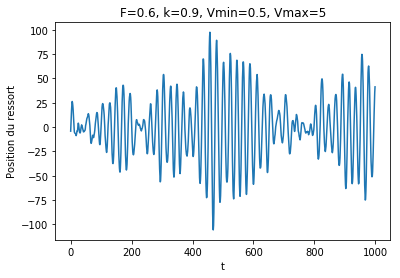

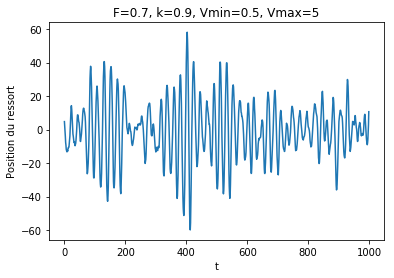

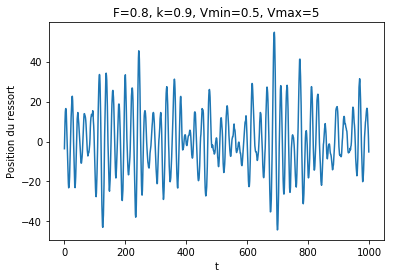

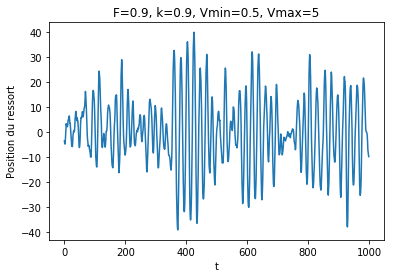

In [5]:
nb_plot = 1

# Plot
for simu in all_simus:
    #for i in range(np.shape(item['simu'])[0]):
    for i in range(nb_plot):
        simu_ressort.plot_ressort(simu['simu'][i, :], simu['F'], simu['k'],
                                  simu['Vmin'], simu['Vmax'])

In [17]:
all_simus

[{'F': 0.1,
  'N': 200,
  'Vmax': 5,
  'Vmin': 0.5,
  'k': 0.1,
  'simu': array([[ -2.08205729e+00,   4.66584147e+00,   1.09109696e+01, ...,
            5.84352693e+01,   6.71736510e+01,   7.66797999e+01],
         [  4.90392181e+00,   1.74656548e+00,  -2.39534488e+00, ...,
            7.44507088e+01,   8.09949131e+01,   8.68092322e+01],
         [  3.92982111e-01,  -4.42486843e+00,  -9.34406483e+00, ...,
            4.01930479e+02,   3.86716797e+02,   3.65819324e+02],
         ..., 
         [  2.01375666e+00,   4.34257621e+00,   6.69350379e+00, ...,
           -2.62416679e+02,  -2.48010622e+02,  -2.32078953e+02],
         [ -5.20986785e-01,  -5.95658987e-01,   1.07561971e+00, ...,
           -2.85116686e+02,  -2.67264094e+02,  -2.47215807e+02],
         [  3.95212352e+00,  -2.70244791e+00,  -9.01115521e+00, ...,
            1.24983160e+02,   1.30707140e+02,   1.36276030e+02]])},
 {'F': 0.2,
  'N': 200,
  'Vmax': 5,
  'Vmin': 0.5,
  'k': 0.1,
  'simu': array([[ -3.74942342e+00,  -1.54